# Richards' Equation, steady state

Nearly all production ATS simulations start with subsurface flow as their basis. The basic form of this is the Richards equation.

This example solves a simple vertical, pseudo-1D column of water with a water table below the surface.  It solves the pressure to steady-state.  For constant density and incompressible solid, this would be a linear pressure profile, but we include a pressure-dependent density.

Author: Ethan Coon

In [1]:
%matplotlib inline

In [2]:
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'docs', 'documentation', 'source', 'ats_demos'))

import ats_xdmf
import plot_column_data
import numpy as np
from matplotlib import pyplot as plt
import run_demos

In [3]:
# run the demo -- note this only runs the first time, either use force=True or delete the subdirectory to rerun
run_demos.run_demo_local("richards_steadystate")

  Test log file : LOGS/ats-tests-2024-04-15_08-15-23.testlog
Running ATS demo problems :
01_richards_steadyst | .

----------------------------------------------------------------------
Regression test summary:
    Total run time: 2.04633 [s]
    Total tests : 1
    Tests run : 1
    All tests passed.




In [4]:
# load the ATS solution
directory = "./richards_steadystate.demo"
vis = ats_xdmf.VisFile(directory)
vis.loadMesh(columnar=True)


Plotted below are the liquid saturation, ranging from saturated at the bottom, up through the vadose zone, to nearly residual saturation at the surface.  Note that the shape and thickness of the capillary fringe (the region above the water table with a signficant amount of saturation above residual) is determined by the water retention model parameters, in this case a van Genuchten model.

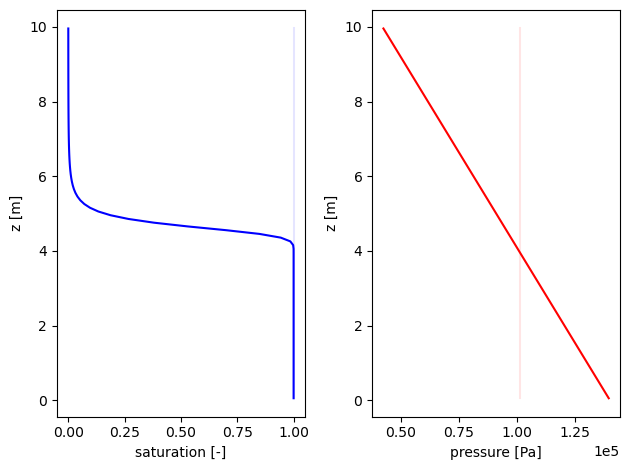

In [5]:
# plot the solution
fig = plt.figure()
axs = fig.subplots(1,2)
plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[0], None, 'b')
plot_column_data.plot_subsurface(vis, ['pressure',], axs[1], None, 'r')
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs[0].set_xlabel('saturation [-]')
axs[0].set_ylabel('z [m]')
axs[1].set_xlabel('pressure [Pa]')
axs[1].set_ylabel('z [m]')
plt.tight_layout()
plt.show()